In [5]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import pymysql

## 평가 데이터 가져오기

In [19]:
# Mysql에서 데이터 가져오는 함수
def get_mysql_data(str):
    conn = pymysql.connect(host = "localhost",
             user= "root", password = "1234", charset = "utf8")
    cursor = conn.cursor()
    cursor.execute(str)
    data = cursor.fetchall()
    return data

In [37]:
# 데이터의 columns_name을 지정함
Raw_df = pd.DataFrame(columns=['menu_id','time', 'user_name', 'deaning', 'couple',
                'drink', 'family','friend', 'number', 'plating', 'price', 
                'restaurant_id', 'service', 'solo','taste','url'], data = get_mysql_data("select * from young_cheline.evaluate"))

In [36]:
Raw_df

,menu_id,time,user_name,deaning,couple,drink,family,friend,number,plating,price,restaurant_id,service,solo,taste,url
0,1,2023/11/21 8:28:33 오후 GMT+9,ehddbs4521,1,0,,1,4,1,1,1,1883770159,3,,1,
1,2,2023/11/28 11:43:06 오후 GMT+9,ehddbs4521,,,,,4,2,,3,15752650,,2,1,
2,2,2023/11/28 11:45:17 오후 GMT+9,ehddbs4521,,,,,4,39,,3,11300334,,,1,
3,3,2023/11/23 7:14:26 오후 GMT+9,ehddbs4521,2,,,,4,3,1,3,714569417,2,2,3,
4,4,2023/11/28 11:43:44 오후 GMT+9,ehddbs4521,,,,,,4,,4,11385265,,2,2,
5,4,2023/11/28 11:48:43 오후 GMT+9,ehddbs4521,,,,,4,5,1,3,11385265,3,2,3,
6,5,2023/11/21 9:58:17 오후 GMT+9,ehddbs4521,2,,,,4,6,1,3,287757696,2,,3,
7,6,2023/11/21 7:42:44 오후 GMT+9,ehddbs4521,2,,,,4,9,1,4,392495073,2,,2,
8,7,2023/11/23 7:15:01 오후 GMT+9,ehddbs4521,2,,,,4,7,1,3,392495073,1,2,2,
9,7,2023/11/28 11:45:11 오후 GMT+9,ehddbs4521,,,,,4,8,,3,392495073,,,1,


In [47]:
user_df = pd.DataFrame(columns = ['id','active','email','password','role','temp_pw','time','user_name'],data = get_mysql_data("select * from young_cheline.user"))

In [48]:
user_df

,id,active,email,password,role,temp_pw,time,user_name
0,2,b'\x01',ehddbs452100@naver.com,$2a$10$bnTARL4CwoAf5KGI5ZIr9eRoxvqMR9XR62q3se3...,None,None,2023-11-16 02:12:21.121289,ehddbs4521
1,3,b'\x01',92f8a6bc-c,$2a$10$yG8.Xpcd91BzO0z2zJSwguOih3emckrD.Ouga5R...,None,None,NaT,00c04056-58
2,4,b'\x01',7ce5f453-e,$2a$10$Ge8tRj4hwT1vv.MIkMYqeuKZYrBPxlJG0haZqm0...,None,None,NaT,7c12ec6e-98
3,5,b'\x01',48d7bd60-3,$2a$10$IlTwPARUqUDZYex68XCvh.pZAxaHmc4jppo9N.J...,None,None,NaT,939396d1-ca
4,6,b'\x01',51e62ad4-a,$2a$10$yHdM/J1cL1/qik8MKfo/X.dQAVRWNINvXAmT9lJ...,None,None,NaT,466dcd86-93
...,...,...,...,...,...,...,...,...
9996,9998,b'\x01',639f1d99-1,$2a$10$E5wbhFkhVI2lMARA8bwfeufH0qEilLot8X0GV9T...,None,None,NaT,db3ec4ae-25
9997,9999,b'\x01',56da92ff-9,$2a$10$tigxJT6y9y6srI5YYXvjfu5/Tt4F/JEF3y9juLD...,None,None,NaT,7cf35bbb-8a
9998,10000,b'\x01',fbf9121d-f,$2a$10$4skA0C1ihiFtDpqmWGZS1uzl9rp50zKQ1.Dz3Vj...,None,None,NaT,172c0519-d2
9999,10001,b'\x01',d9191fe9-0,$2a$10$kz.dbdJNLVA7oZE1.fgXy.9HxetndqfLIWGfLK1...,None,None,NaT,89fe0ed0-29


## 데이터 전처리 [샘플데이터 추출, Null처리,피벗테이블]

In [49]:
user_id = user_df.iloc[:,0].tolist()

In [54]:
Raw_df.iloc[:,0]

0      1
1      2
2      2
3      3
4      4
5      4
6      5
7      6
8      7
9      7
10     8
11     8
12     8
13     8
14     8
15     9
16     9
17    10
18    10
19    11
20    11
21    12
22    12
23    13
24    13
25    14
26    14
27    15
28    16
29    17
30    18
31    19
32    20
33    21
34    22
35    22
36    22
37    23
38    24
39    25
40    26
41    26
42    27
43    28
44    29
45    30
46    31
47    32
48    32
49    33
50    34
Name: menu_id, dtype: int64

In [79]:
# 평가 데이터에서 가게이름과 메뉴이름, 맛을 랜덤으로 중복추출 하여 정규분포를 따르는 심플데이터 생성
# 적은 데이터를 극복하기 위해 사용함.
# 가게이름과 메뉴이름은 합쳐서 메뉴 아이디로 사용함
def Normal_Random_Sample(df,id,n):
    df_num = len(df)
    rest_id = df.iloc[:,11].tolist()
    menu_id = df.iloc[:,0].tolist()
    mu = df.loc[:,'taste'].tolist()
    extract = []
    for i in range(n):
        random_index = random.randrange(df_num)
        mean = int(mu[random_index])
        rest = rest_id[random_index]
        menu = menu_id[random_index]
        user = id[random.randrange(10001)]
        ran_taste = np.random.normal(mean,1,1)[0]
        if ran_taste<0.5:
            i = i-1
            continue
        else:
            extract.append([rest+str(menu),ran_taste,user])

    return pd.DataFrame(columns = ['menu_id', 'taste','user_id'], data = extract)

In [80]:
# 임시로 100,000개의 데이터 생성해서 분석에 사용
NRS_df = Normal_Random_Sample(Raw_df,user_id, 100000)

In [6]:
# 임시 데이터 저장
#NRS_df.to_csv('Normal_Random_Sample.csv')

In [82]:
NRS_df

,menu_id,taste,user_id
0,77796378032,1.233984,4993
1,3924950737,2.014985,8753
2,2740703614,1.580244,5783
3,2740703614,1.091164,3221
4,2740703614,1.572488,4759
...,...,...,...
81051,113852654,4.578258,8903
81052,1130033422,1.527294,163
81053,4347888189,2.053310,5519
81054,156661286417,1.366375,9815


In [84]:
# 평가한 유저의 목록 가져오기
col_list = user_id
#list(set(NRS_df.iloc[:,2].tolist()))

In [85]:
# 피벗테이블 생성
def make_ptable(df):
    ptable = df.pivot_table(values = 'taste', index = 'menu_id', columns = 'user_id')
    
    return ptable

In [86]:
#피벗테이블로 데이터를 가공
menu_user=make_ptable(NRS_df)
menu_id = menu_user.index.to_list()

In [87]:
 #0으로 채우기
temp=menu_user.fillna(0)

## 코사인 유사도로 추천 목록 만들기

In [88]:
# #코사인 유사도 구하기
cos=cosine_similarity(temp)
cos=pd.DataFrame(data=cos, index=menu_id,columns=menu_id)

In [89]:
# 코사인 유사도로 판별된 추천할만한 목록 10개 출력 함수
def recomand(user_id):
    ex = menu_user.assign(menu=menu_id)
    user_menu=ex.loc[ex[user_id].notnull(), [user_id, 'menu']]
    user_cos=cos[user_menu['menu']]
    user_cos=user_cos[~user_cos.isin(user_cos.loc[user_menu['menu']])].dropna()
    X_vector = user_menu.iloc[:,[0]].values/7+1
    Y_matrix= user_cos.to_numpy()
    Matrix_product=Y_matrix.dot(X_vector)
    user_cos['Sum']=Matrix_product
    user_recomand=user_cos.sort_values('Sum',ascending=False).head(10).index.to_list()
    return user_recomand

In [90]:
#모든 사용자의 추천 목록을 받아오는 코드
#for i in col_list:
#    A = recomand(i)
#    print(A)

#한명의 추천 목록을 받아오는 테스트 코드
A = recomand(col_list[0])
print(A)

['1130033422', '113852654', '77796378032', '2063885110', '4347888189', '3924950737', '2740703614', '202030582126', '125868008811', '2877576965']


---

In [91]:
#샘플 데이터의 데이터프레임
NRS_df

,menu_id,taste,user_id
0,77796378032,1.233984,4993
1,3924950737,2.014985,8753
2,2740703614,1.580244,5783
3,2740703614,1.091164,3221
4,2740703614,1.572488,4759
...,...,...,...
81051,113852654,4.578258,8903
81052,1130033422,1.527294,163
81053,4347888189,2.053310,5519
81054,156661286417,1.366375,9815


In [92]:
#위에서 피벗테이블 만들 때 생성한 menu_id목록 가져오기
#menu_id_list = list(set(NRS_df.iloc[:,0].tolist()))
menu_id_list = menu_id

In [93]:
# 메뉴의 평균을 구해서 데이터프레임으로 생성
df_list = []
for i in range(len(menu_id_list)):
    target = menu_id_list[i]
    target_mean = NRS_df[NRS_df.iloc[:,0] == target].describe().iloc[1,0]
    df_list.append([target, target_mean])
pd.DataFrame(columns = ['menu_id','mean'], data = df_list)

,menu_id,mean
0,103061278,2.604264
1,103278199329,1.503235
2,113003342,1.485850
3,1130033422,1.765421
4,113852654,2.572824
5,125868008811,1.499902
6,132371620730,2.988482
7,14334358519,1.487071
8,156661286417,1.492891
9,157526502,1.463650


C:\Users\effor\AppData\Local\Temp\ipykernel_19948\1256936178.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Mean = menu_mean_list[i]


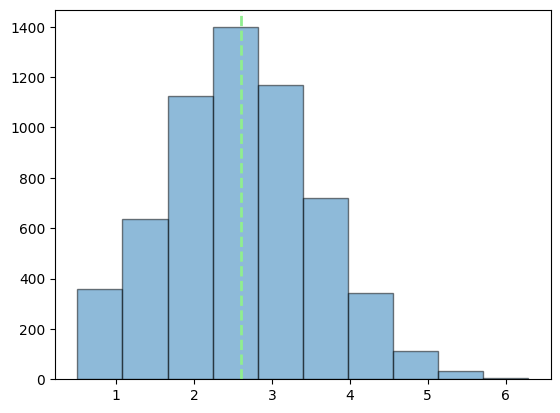

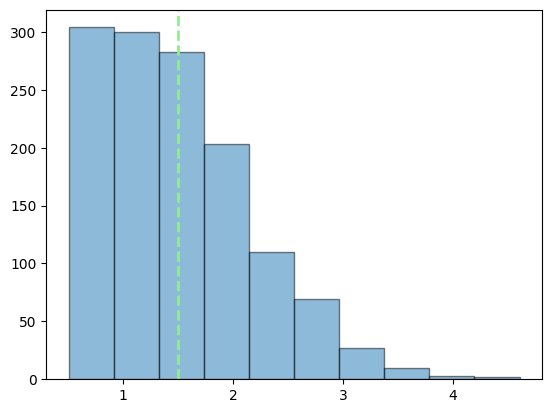

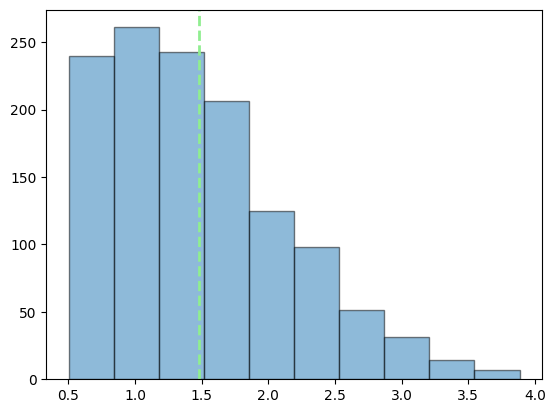

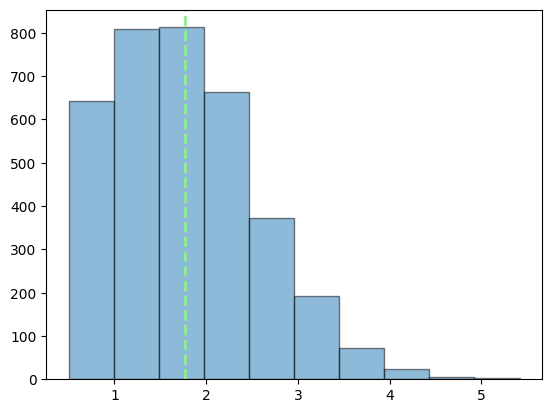

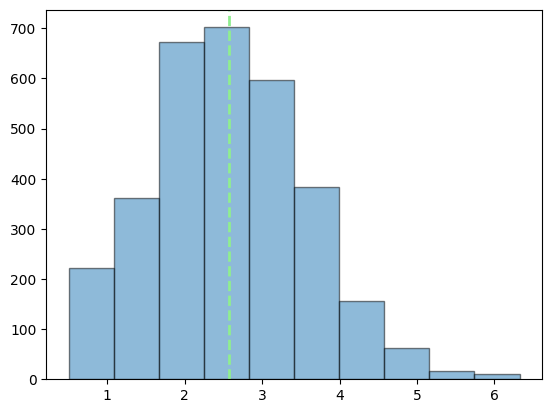

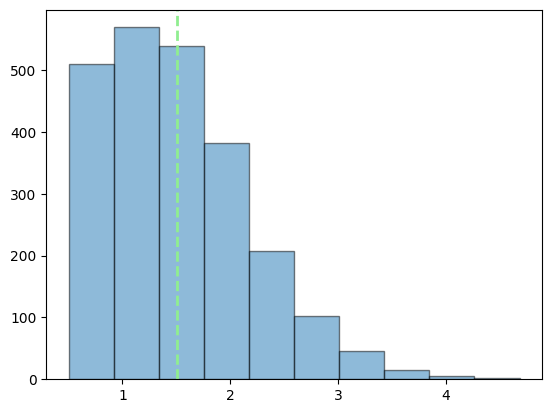

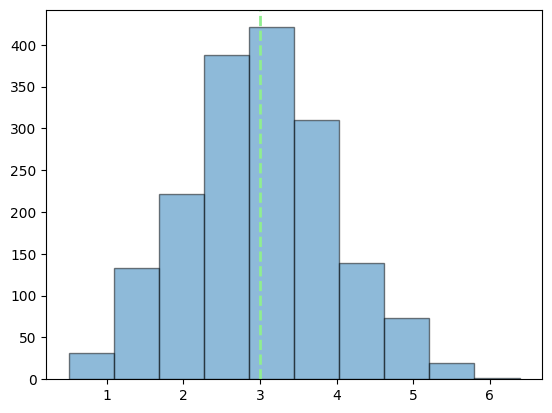

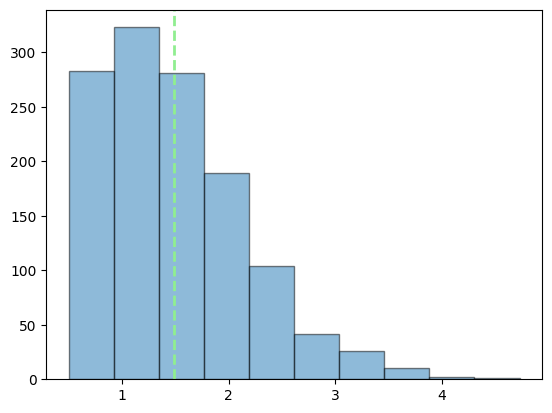

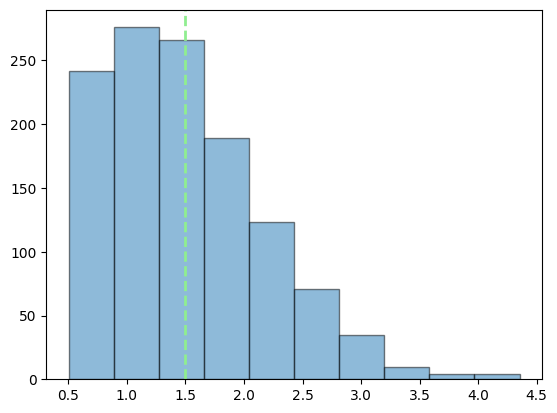

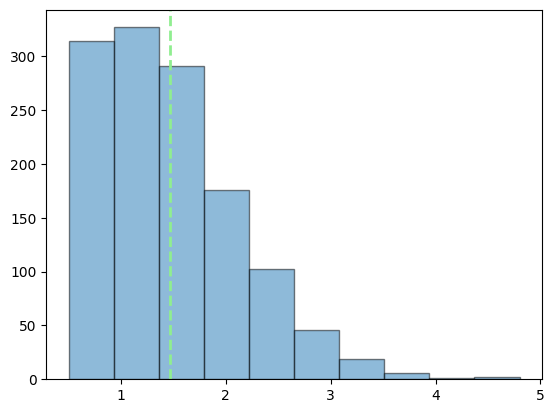

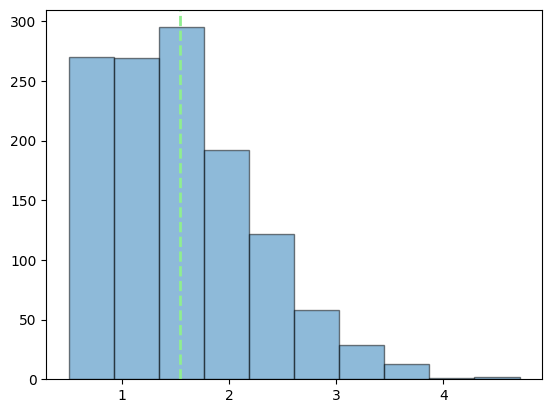

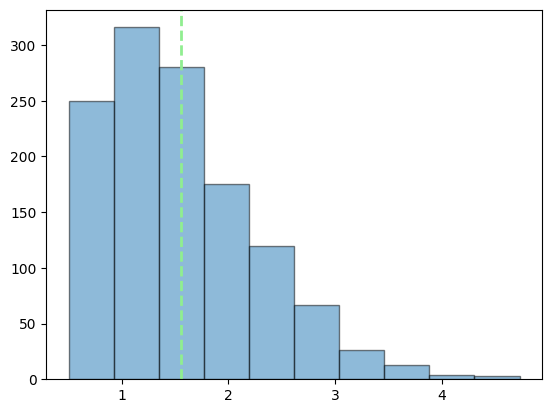

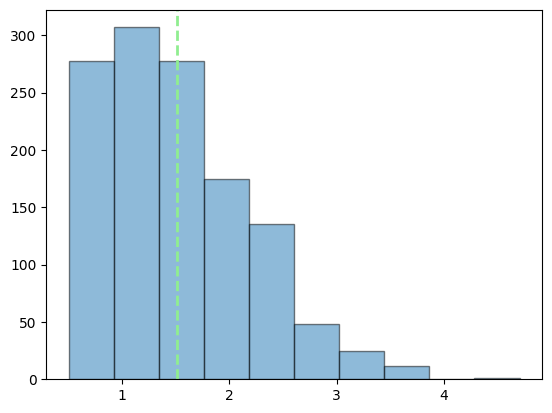

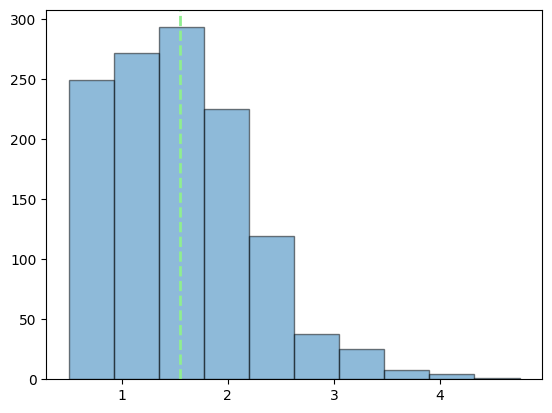

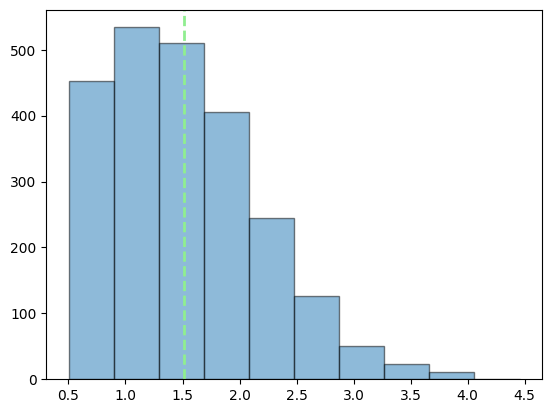

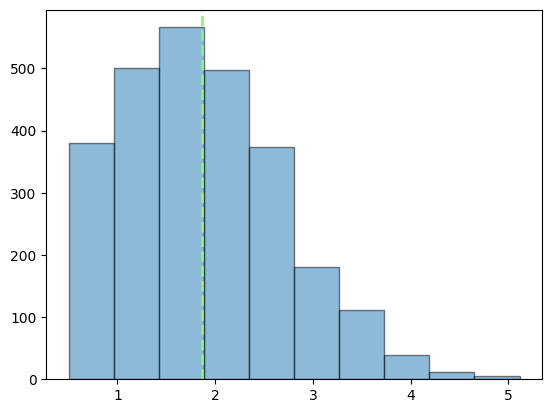

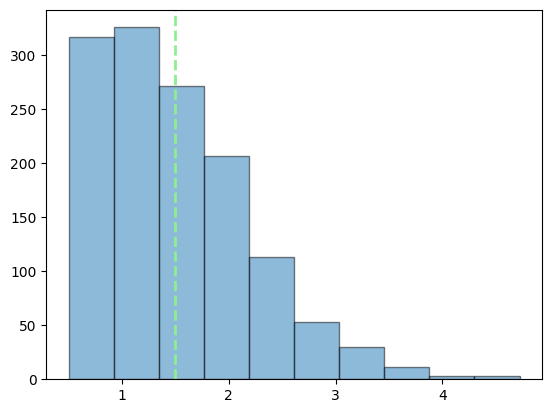

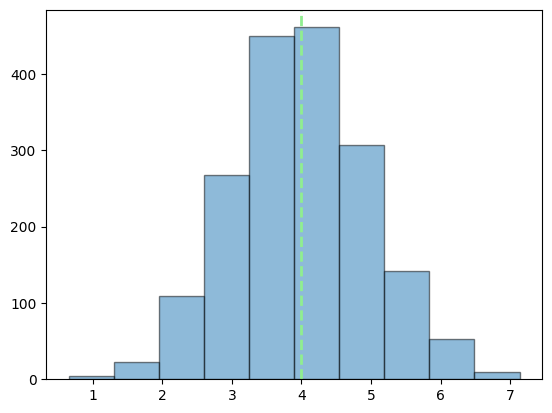

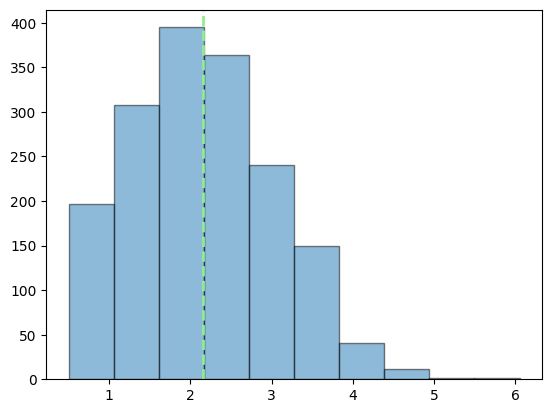

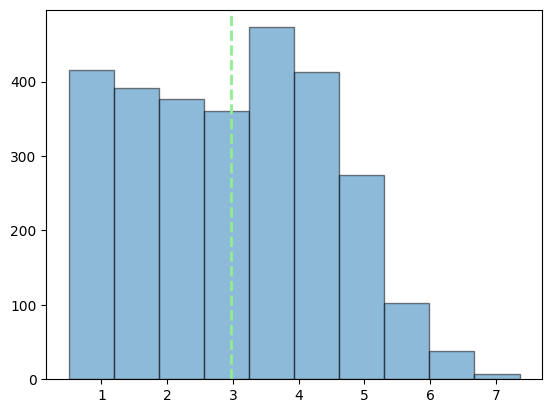

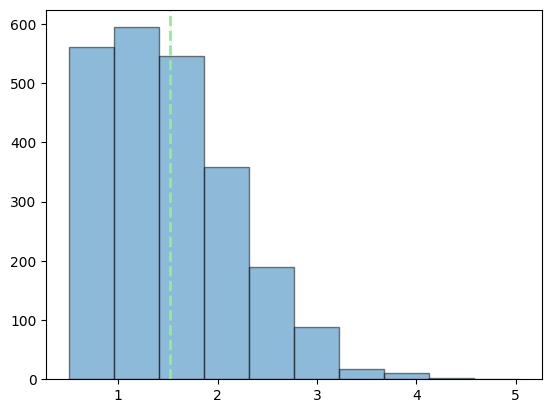

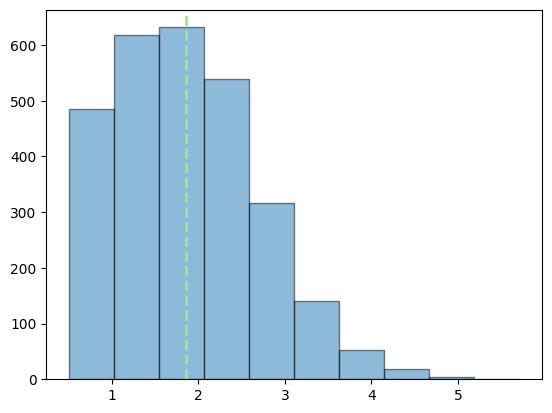

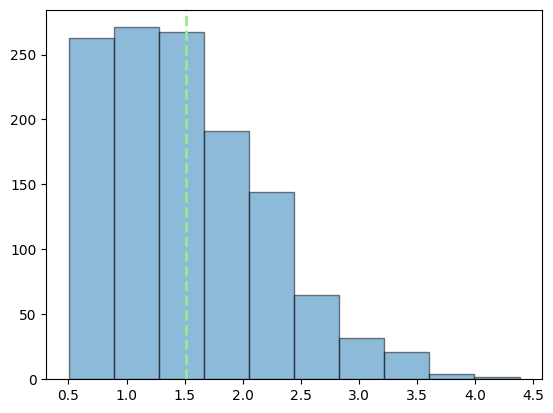

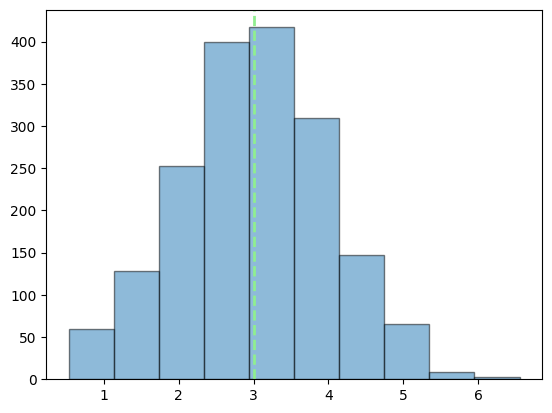

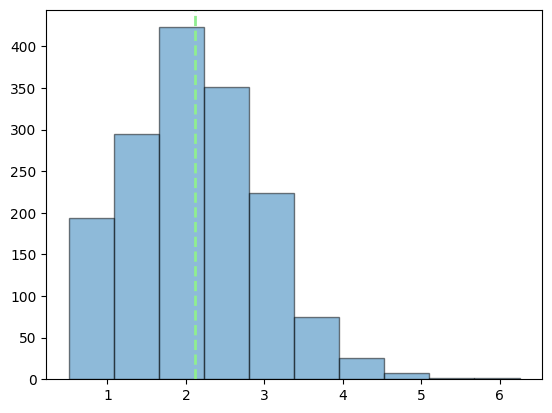

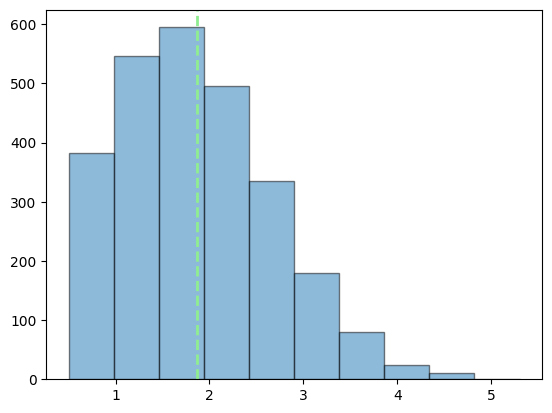

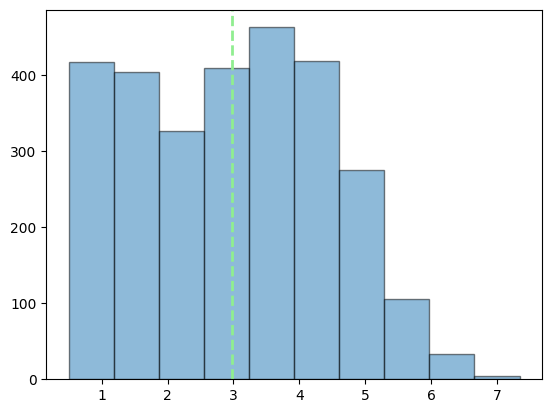

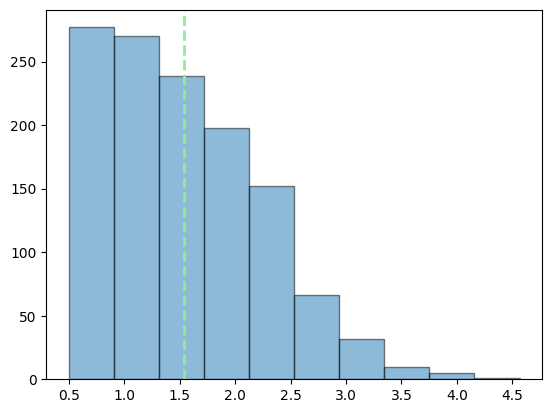

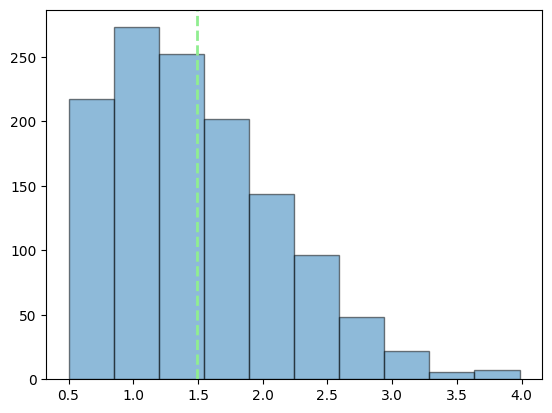

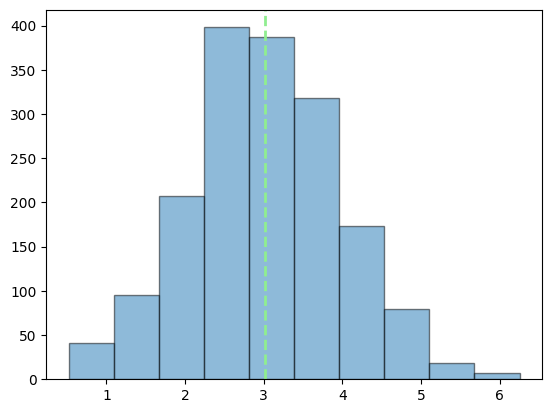

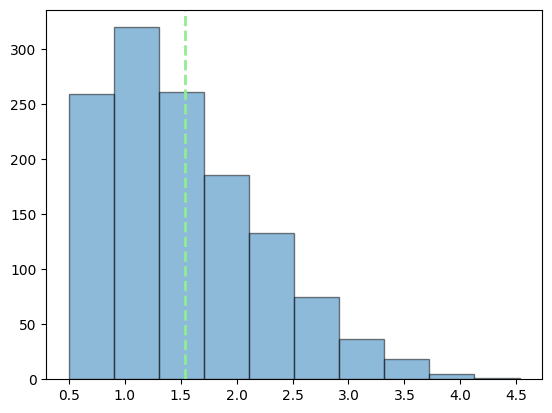

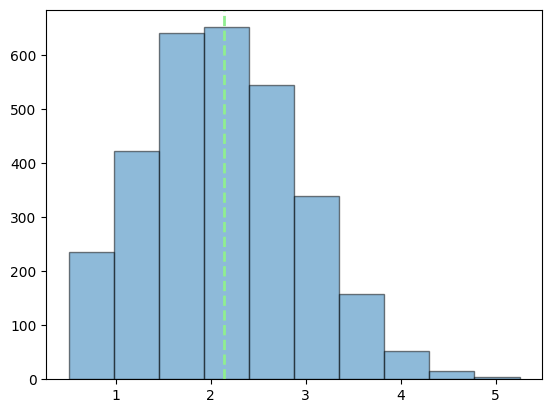

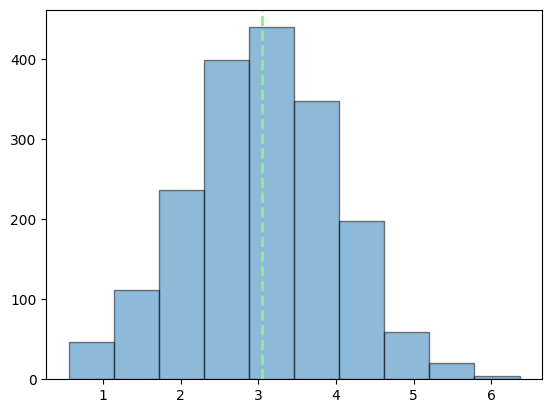

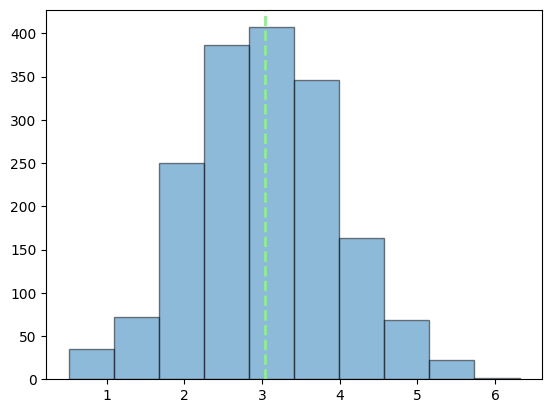

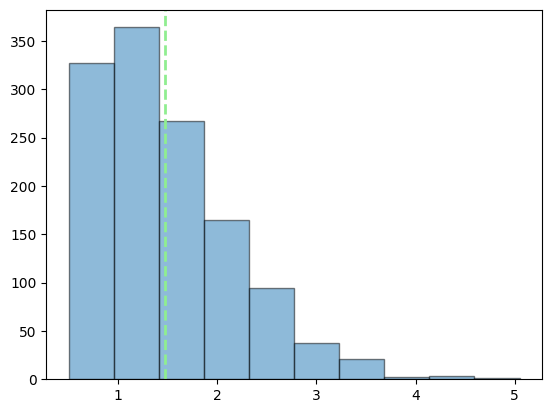

In [94]:
#피벗테이블을 가져와 계산을 편하게 한다.
p_table=make_ptable(NRS_df).transpose()

#데이터와 평균을 넣으면 데이터는 히스토그램으로, 평균은 수직선으로 표시해주는 함수
def histo_mean_graph(data,mean):
    plt.hist(data, alpha = 0.5 ,edgecolor='black')
    plt.axvline(mean, 0, 400, color='lightgreen', linestyle='--', linewidth=2)
    plt.show()

menu_mean_list = p_table.describe().iloc[1,:]

for i in range(len(menu_mean_list)):
    Data = p_table.iloc[:,i]
    Mean = menu_mean_list[i]
    histo_mean_graph(Data, Mean)

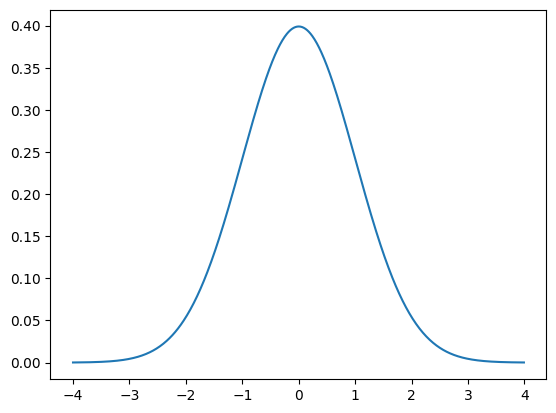

In [97]:
x = np.arange(-4, 4, 0.01)
y = (lambda x: 1/np.sqrt(2*np.pi)/np.exp(x**2/2))(x)
plt.plot(x, y)
plt.show()

In [98]:
# 각 메뉴들의 평균을 계산한다.
p_table.describe()

menu_id,103061278,103278199329,113003342,1130033422,113852654,125868008811,132371620730,14334358519,156661286417,157526502,...,3924950737,4347888189,44434051915,44434051916,7145694173,74662351723,77796378032,8666094834,88078194020,98311442921
count,5901.000000,1311.000000,1276.000000,3597.000000,3184.000000,2379.000000,1737.000000,1261.000000,1220.000000,1284.000000,...,2651.000000,2856.000000,1250.000000,1267.000000,1723.000000,1295.000000,3062.000000,1864.000000,1750.000000,1281.000000
mean,2.607229,1.501035,1.481685,1.768721,2.570197,1.503511,2.996604,1.485572,1.498513,1.467070,...,1.868039,2.975696,1.538235,1.490050,3.018783,1.539800,2.137734,3.049931,3.034405,1.472176
std,0.966017,0.687942,0.668860,0.789892,0.991061,0.669083,0.956966,0.676549,0.672243,0.666417,...,0.806398,1.451017,0.705562,0.654898,0.956325,0.709616,0.818005,0.953116,0.924536,0.693349
min,0.500621,0.505608,0.502712,0.501032,0.501634,0.500504,0.500840,0.500287,0.502348,0.501014,...,0.500838,0.501256,0.500027,0.501003,0.519452,0.500530,0.501672,0.557918,0.510272,0.500301
25%,1.941516,0.954648,0.952748,1.158540,1.882408,0.969693,2.347973,0.960871,0.983444,0.947768,...,1.253938,1.701592,0.964272,0.970447,2.390019,0.981874,1.554418,2.411212,2.418543,0.947081
50%,2.596756,1.404932,1.374676,1.664723,2.506040,1.417524,2.988224,1.375730,1.391543,1.363634,...,1.794657,3.026178,1.434381,1.379804,2.987933,1.401837,2.089697,3.047522,3.013765,1.349200
75%,3.244042,1.908112,1.882384,2.272820,3.229074,1.906287,3.632357,1.880636,1.884046,1.847916,...,2.376243,4.114091,2.015971,1.902390,3.658396,1.992981,2.699984,3.695651,3.668160,1.869619
max,6.292468,4.605977,3.883997,5.417296,6.325011,4.683231,6.388036,4.730292,4.353844,4.800380,...,5.303142,7.337193,4.564358,3.984379,6.254791,4.527964,5.252105,6.362631,6.315459,5.048829


In [99]:
# 각 메뉴들의 평균들의 평균과 표준편차를 구해서 정규화에 사용한다.
menu_mean_list= p_table.describe().iloc[1,:]
menu_mean_mean = menu_mean_list.mean()
menu_mean_std = menu_mean_list.std()

In [100]:
# 메뉴별 맛의 평균 및 표준편차
print(menu_mean_mean, menu_mean_std)

2.033914807639114 0.6911997845243535


In [101]:
# 누적확률 계산을 위한 정규분포 세팅 
rv = sp.stats.norm(0,1)

In [102]:
# 메뉴가 몇 퍼센트의 음식인지 계산
menu_percent = 1-rv.cdf((menu_mean_list - menu_mean_mean)/menu_mean_std)

In [103]:
#계산한 퍼센트와 음식을 매칭시키는 함수
df_data = []
for i in range(len(menu_percent)):
    df_data.append(round(menu_percent[i]*100,3))

Percent_DeliFood_df = pd.DataFrame(columns = ['상위 N% 맛식'],data = df_data, index = p_table.columns.tolist())

In [104]:
Percent_DeliFood_df

,상위 N% 맛식
103061278,20.343
103278199329,77.963
113003342,78.784
1130033422,64.939
113852654,21.891
125868008811,77.857
132371620730,8.184
14334358519,78.620
156661286417,78.071
157526502,79.392


In [111]:
def get_menu_id():
    conn = pymysql.connect(host = "localhost",
             user= "root", password = "1234", charset = "utf8")
    cursor = conn.cursor()
    cursor.execute('''SELECT max(menu_id) FROM young_cheline.menu;''')
    menu_data = cursor.fetchall()
    menu_data = menu_data[0][0]
    return menu_data

In [114]:
def get_week_avg(menu_id):
    conn = pymysql.connect(host = "localhost",
        user= "root", password = "1234", charset = "utf8")
    cursor = conn.cursor()

    cursor.execute('''SELECT DATE_FORMAT(time, '%Y-%u') as week, menu_id, avg(flavor)
                FROM young_cheline.evaluate
                WHERE menu_id = {}
                GROUP BY week
                ORDER BY menu_id, week;'''.format(menu_id))
    
    data = cursor.fetchall()
    df = pd.DataFrame(data, columns=['time', 'menu_id', 'flavor'])

    return df

In [115]:
if __name__ == "__main__":
    range_menu = get_menu_id()

    for id in range(1,range_menu + 1):
        df = get_week_avg(id)
        print(df)


OperationalError: (1054, "Unknown column 'flavor' in 'field list'")

In [108]:
def get_mean_taste():
    conn = pymysql.connect(host = "localhost",
                user= "root", password = "1234", charset = "utf8")
    cursor = conn.cursor()
    cursor.execute("select menu_id, restaurant_id,AVG(taste) from young_cheline.evaluate group by menu_id, restaurant_id;")
    res = cursor.fetchall()
    return res

In [109]:
def get_count():
    conn = pymysql.connect(host = "localhost",
                user= "root", password = "1234", charset = "utf8")
    cursor = conn.cursor()
    cursor.execute("select count(*) from young_cheline.evaluate group by menu_id;")
    g_menu_id = cursor.fetchall()

    cursor.execute('''SELECT menu_id, COUNT(CASE WHEN couple LIKE '0' THEN 1 END) AS specific_count
        FROM young_cheline.evaluate
        GROUP BY menu_id;''')
    
    couple = cursor.fetchall()
    
    cursor.execute('''SELECT menu_id, COUNT(CASE WHEN family LIKE '1' THEN 1 END) AS specific_count
        FROM young_cheline.evaluate
        GROUP BY menu_id;''')
    
    family = cursor.fetchall()

    cursor.execute('''SELECT menu_id, COUNT(CASE WHEN solo LIKE '2' THEN 1 END) AS specific_count
        FROM young_cheline.evaluate
        GROUP BY menu_id;''')
    
    solo = cursor.fetchall()

    cursor.execute('''SELECT menu_id, COUNT(CASE WHEN drink LIKE '3' THEN 1 END) AS specific_count
                    FROM young_cheline.evaluate
                    GROUP BY menu_id;''')
    
    drink = cursor.fetchall()

    cursor.execute('''SELECT menu_id, COUNT(CASE WHEN friend LIKE '4' THEN 1 END) AS specific_count
        FROM young_cheline.evaluate
        GROUP BY menu_id;''')
    
    friend = cursor.fetchall()

    cursor.execute('''SELECT menu_id, AVG(NULLIF(cleaning, '')),AVG(NULLIF(plating, '')),AVG(NULLIF(price, '')),AVG(NULLIF(service, ''))
        FROM young_cheline.evaluate
        GROUP BY menu_id;''')
    
    avg_exxtra = cursor.fetchall()

    eva = get_mean_taste()
    for menu_id in range(0, len(g_menu_id)):
        menu_count =g_menu_id[menu_id][0] #메뉴별 평가 갯수
        
        menu = eva[menu_id][0]
        restaurant_id = eva[menu_id][1]
        avg_taste = eva[menu_id][2]

        cleaning = avg_exxtra[menu_id][1]
        plating = avg_exxtra[menu_id][2]
        price = avg_exxtra[menu_id][3]
        service = avg_exxtra[menu_id][4]

        ## mood
        solo2 = 2 if  (solo[menu_id][1]/ menu_count) >0.8 else None
        couple0 = 0 if  (couple[menu_id][1]/ menu_count) >0.8 else None
        drink3 = 3 if  (drink[menu_id][1]/ menu_count) >0.8 else None
        family1 = 1 if  (family[menu_id][1]/ menu_count) >0.8 else None
        friend4 = 4 if  (friend[menu_id][1]/ menu_count) >0.8 else None

        cursor.execute('''INSERT INTO young_cheline.restaurant_evaluate
            (menu_id, cleaning, plating, price, restaurant_id, service, taste, couple, drink, family, friend, solo)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)''',
                       (menu, cleaning, plating, price, restaurant_id, service, avg_taste, couple0, drink3, family1, friend4, solo2))

    
    conn.commit()


In [110]:
if __name__ == "__main__":
    res = get_count()

OperationalError: (1045, "Access denied for user 'root'@'localhost' (using password: YES)")

def Sample_Data_Random_Repeat(df,n):
    DF = df
    DF_num = len(DF)
    ExtractionValues = []
    for i in range(n):
        random_index = random.randrange(DF_num)
        extractionList = DF.iloc[random_index].to_list()
        ExtractionValues.append(extractionList)
    return ExtractionValues

data = Sample_Data_Random_Repeat(Raw_df,5000)

ExtractionDf = pd.DataFrame(data = data,columns=['EvaluationTime', 'Gender', 'RestaurantName', 'MenuName', 'Taste',
                'Plating', 'AmbienceDate','AmbienceFamily', 'AmbienceAlone', 'AmbienceAlcohol', 'AmbienceFriend', 
                'Service', 'Cleanness', 'Cost'])

ExtractionDf.to_csv('RandomRepeatData.csv')

for i in range(len(NRS_df)):
    row = NRS_df.iloc[i,0]
    col = NRS_df.iloc[i,2]
    val = NRS_df.iloc[i,1]
    for j in range(len(row_list)):
       if row == row_list[j]:
           for k in range(len(col_list)):
               if col == col_list[k]:
                   user_history_df.iloc[j,k] = int(val)

user_history_df

colum = list(set(NRS_df.iloc[:,2].tolist()))

menu_list = list(set(NRS_df.iloc[:,0].tolist()))

user_history_df = pd.DataFrame(columns = colum, index = menu_list)

row_list = user_history_df.index.tolist()